In [62]:
import pandas as pd 

all_content = pd.read_csv('all_content_2020_v4.csv')
all_content.head()


C:\Users\frede\AppData\Local\Temp\ipykernel_15716\1951467066.py:3: DtypeWarning: Columns (1,4,8,519,520,521) have mixed types. Specify dtype option on import or set low_memory=False.
  all_content = pd.read_csv('all_content_2020_v4.csv')


,Unnamed: 0,CODGEO,EU_circo,num_region,num_dep,nom_commune,nom_dep,nom_region,num_chef_lieu,nom_chef_lieu,...,ETCTOT19,ETCBE19,ETCFZ19,ETCGI19,ETCJZ19,ETCKZ19,ETCLZ19,ETCMN19,ETCOQ19,ETCRU19
0,0,1001,Sud-Est,84,1,L'Abergement-Clémenciat,Ain,Auvergne-Rhône-Alpes,69123,Lyon,...,9.0,0.0,1.0,2.0,0.0,1.0,0.0,3.0,1.0,1.0
1,1,1002,Sud-Est,84,1,L'Abergement-de-Varey,Ain,Auvergne-Rhône-Alpes,69123,Lyon,...,5.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0
2,2,1004,Sud-Est,84,1,Ambérieu-en-Bugey,Ain,Auvergne-Rhône-Alpes,69123,Lyon,...,178.0,11.0,27.0,41.0,9.0,5.0,10.0,27.0,27.0,21.0
3,3,1005,Sud-Est,84,1,Ambérieux-en-Dombes,Ain,Auvergne-Rhône-Alpes,69123,Lyon,...,19.0,1.0,7.0,6.0,0.0,0.0,0.0,4.0,1.0,0.0
4,4,1006,Sud-Est,84,1,Ambléon,Ain,Auvergne-Rhône-Alpes,69123,Lyon,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [64]:
#Création d'un df contenant les salaires moyens H et F 
salaires_moyens = all_content.loc[:, ['CODGEO', 'nom_region', 'num_region', 
                                      'SNHMF20', 'SNHMH20', 'SNHMFC20', 'SNHMHC20', 'SNHMFO20','SNHMHO20',
                                      'latitude', 'longitude']]

In [65]:
#On renomme les colonnes relatives aux salaires 
new_names = {'SNHMF20' : 'salaire_moyen_femmes', 
             'SNHMH20' : 'salaire_moyen_hommes', 
             'SNHMFC20': 'salaire_cadre_femmes', 
             'SNHMHC20' : 'salaire_cadre_hommes',
            'SNHMFO20' : 'salaire_ouvrier_femmes',
             'SNHMHO20' :'salaire_ouvrier_hommes'}
salaires_moyens = salaires_moyens.rename(new_names, axis = 1)
salaires_moyens.describe()
salaires_moyens.isna().sum()

CODGEO                        0
nom_region                    0
num_region                    0
salaire_moyen_femmes      29579
salaire_moyen_hommes      29579
salaire_cadre_femmes      29579
salaire_cadre_hommes      29579
salaire_ouvrier_femmes    29579
salaire_ouvrier_hommes    29579
latitude                      8
longitude                     8
dtype: int64

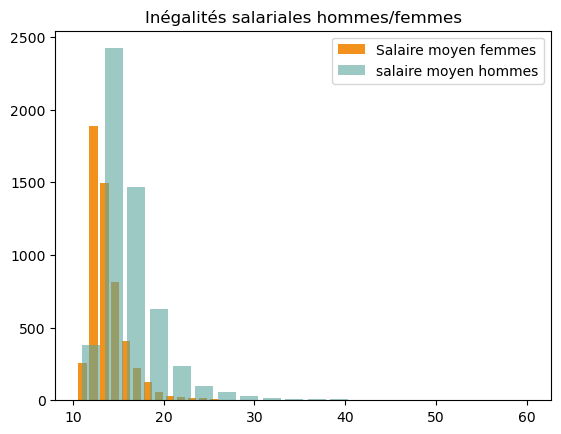

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
#Création d'un histogramme de la répartition du salaire moyen des hommes vs celui des femmes 
plt.hist(salaires_moyens['salaire_moyen_femmes'],
         label='Salaire moyen femmes',
         bins = 20,
         color = '#F2911B',
         rwidth = 0.8)
  
plt.hist(salaires_moyens['salaire_moyen_hommes'], 
         label='salaire moyen hommes', 
         alpha=0.6, 
         bins = 20,
         rwidth = 0.8,
         color = '#5BA69E')
 

plt.legend(loc='upper right')
plt.title('Inégalités salariales hommes/femmes')
plt.show()

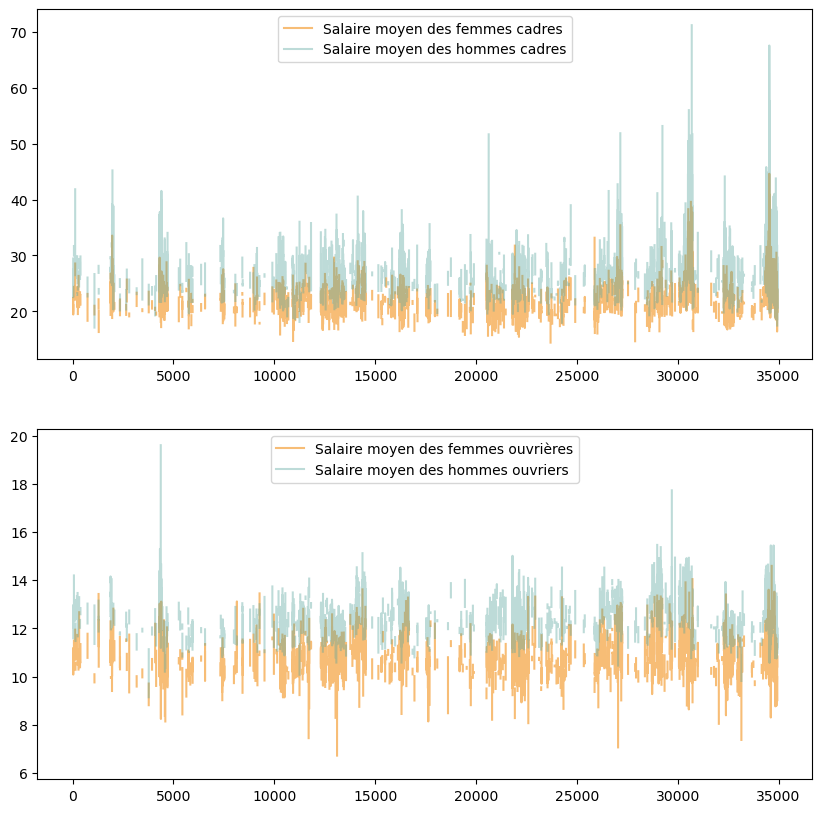

In [67]:
#Création d'un graphique reprenant la superposition des salaires hommes et femmes pour les cadres et les ouvriers 
fig = plt.figure( figsize= (10, 10))
                 
plt.subplot(211)                 
plt.plot(salaires_moyens['salaire_cadre_femmes'], c ='#F2911B', alpha = 0.6, label = "Salaire moyen des femmes cadres")
plt.plot(salaires_moyens['salaire_cadre_hommes'], c ='#5BA69E', alpha = 0.4, label = "Salaire moyen des hommes cadres")
plt.legend()          
                 
plt.subplot(212)              
plt.plot(salaires_moyens['salaire_ouvrier_femmes'], c ='#F2911B', alpha = 0.6, label = "Salaire moyen des femmes ouvrières")
plt.plot(salaires_moyens['salaire_ouvrier_hommes'], c ='#5BA69E', alpha = 0.4, label = "Salaire moyen des hommes ouvriers")
plt.legend();           


In [68]:
#Retrait des lignes relatives aux DOM-TOM
indexNames = salaires_moyens[(salaires_moyens['nom_region'] == 'Martinique')
                            |(salaires_moyens['nom_region'] =='Guyane')
                            |(salaires_moyens['nom_region'] =='Mayotte')  
                            |(salaires_moyens['nom_region'] =='Guadeloupe')
                            |(salaires_moyens['nom_region'] =='La Réunion')].index
salaires_moyens.drop(indexNames, axis=0, inplace=True)

In [69]:
#Importation des packages nécessaire Geopandas
import geopandas as gpd
from shapely.geometry import Point 
%matplotlib inline


In [70]:
#On ajoute la geometry au df
points = salaires_moyens.apply(lambda row: Point(row.longitude, row.latitude), axis = 1)
points

0        POINT (4.925850148 46.153721024)
1        POINT (5.428087796 46.009605679)
2        POINT (5.372275427 45.961048852)
3         POINT (4.911967138 45.99616357)
4        POINT (5.594584599 45.749886304)
                       ...               
34821    POINT (1.730457359 49.086021483)
34822    POINT (2.238718551 49.069898107)
34823    POINT (2.403736201 49.007988385)
34824    POINT (2.386594087 49.074551975)
34825    POINT (1.824388034 49.095847161)
Length: 34826, dtype: object

In [71]:
#Transformation du df en geodataframe
gdf = gpd.GeoDataFrame(salaires_moyens, geometry = points)
#On spécifie que nous avons une colonne latitude/longitude
gdf.crs = {'init': 'epsg:4326'}

C:\Users\frede\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Text(0.5, 1.0, 'Salaire moyen des femmes')

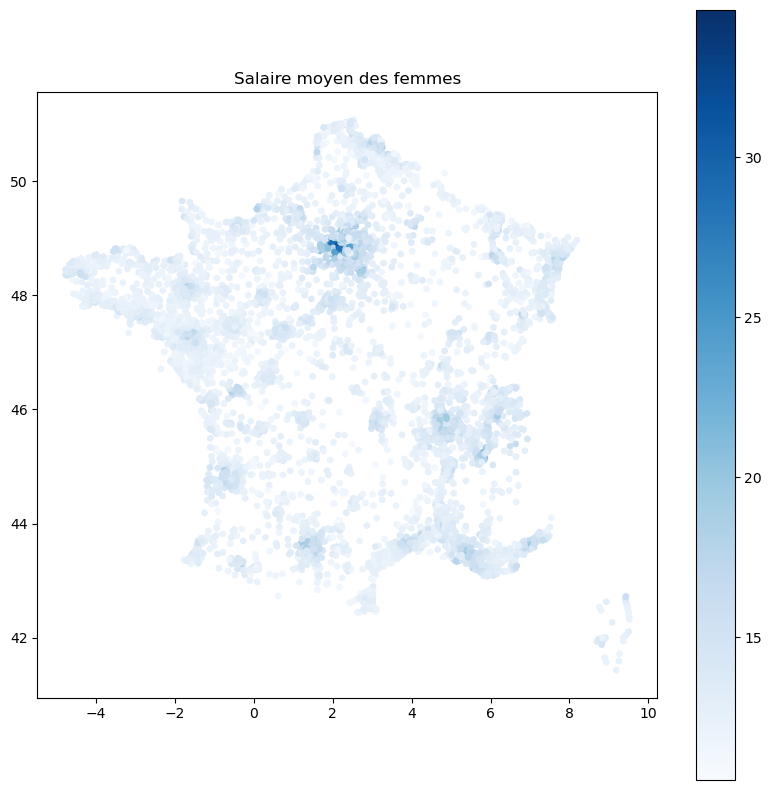

In [72]:
#Distribution du salaire moyen des femmes en France 
gdf.plot(gdf['salaire_moyen_femmes'], cmap = 'Blues', legend = 'True', s=15, figsize =(10,10))
plt.title('Salaire moyen des femmes')

Text(0.5, 1.0, 'Salaire moyen des hommes')

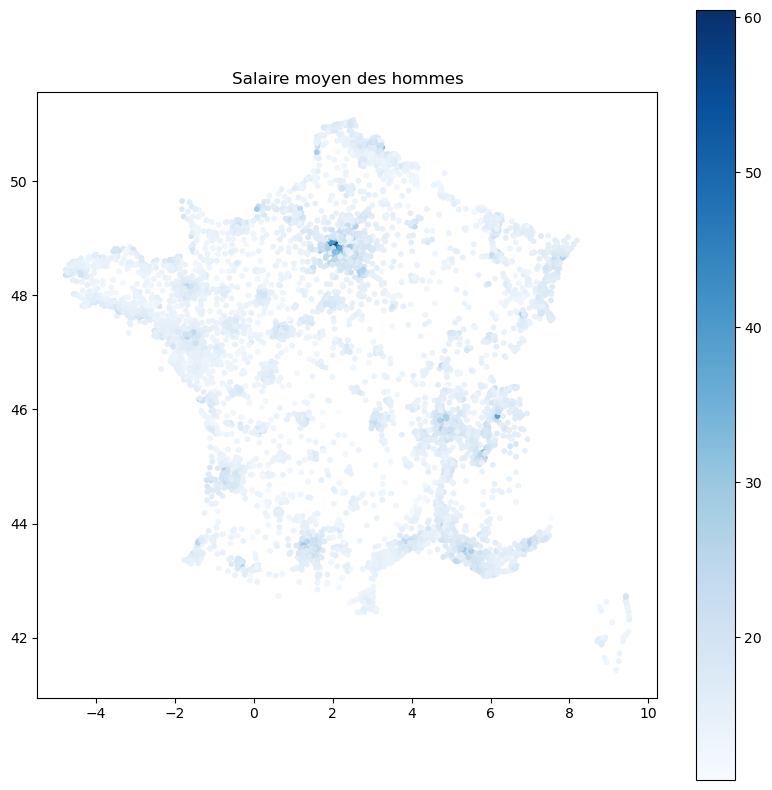

In [73]:
#Distribution du salaire moyen des hommes en France 
gdf.plot(gdf['salaire_moyen_hommes'], legend = 'True', cmap='Blues', s = 10,figsize =(10,10) )
plt.title('Salaire moyen des hommes')

In [74]:
#création d'une colonne Ecart du salaire entre les hommes et les femmes en %
gdf['ecart_salaire_hommes_femmes'] = ((gdf['salaire_moyen_hommes']- gdf['salaire_moyen_femmes'])/gdf['salaire_moyen_hommes'])* 100


In [75]:
gdf['ecart_salaire_hommes_femmes'].max()

68.39431694534989

In [ ]:
#suppression d'une valeur abbérante 
gdf = gdf.drop(15711)

In [77]:
gdf['ecart_salaire_hommes_femmes'].describe()

count    5287.000000
mean       15.881539
std         5.791013
min        -7.846979
25%        12.269757
50%        15.493500
75%        19.144910
max        50.398463
Name: ecart_salaire_hommes_femmes, dtype: float64

Text(0.5, 1.0, 'Ecart salarial hommes/femmes en %')

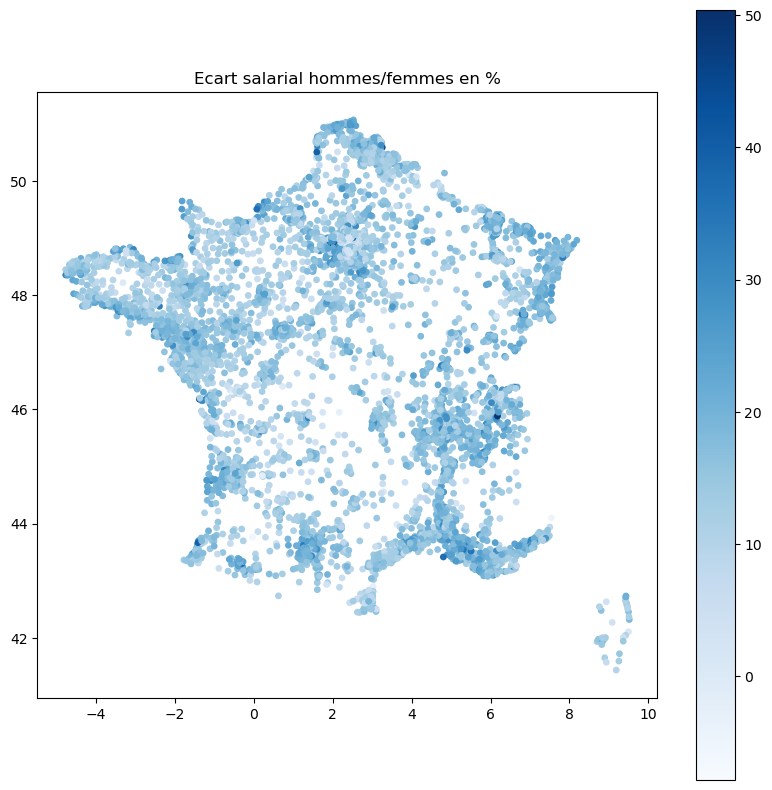

In [80]:
gdf.plot(gdf['ecart_salaire_hommes_femmes'], 
         legend = 'Ecart salarial hommes/femmes', 
         cmap = 'Blues', 
         s = 15,
         figsize =(10,10) )
plt.title('Ecart salarial hommes/femmes en %')


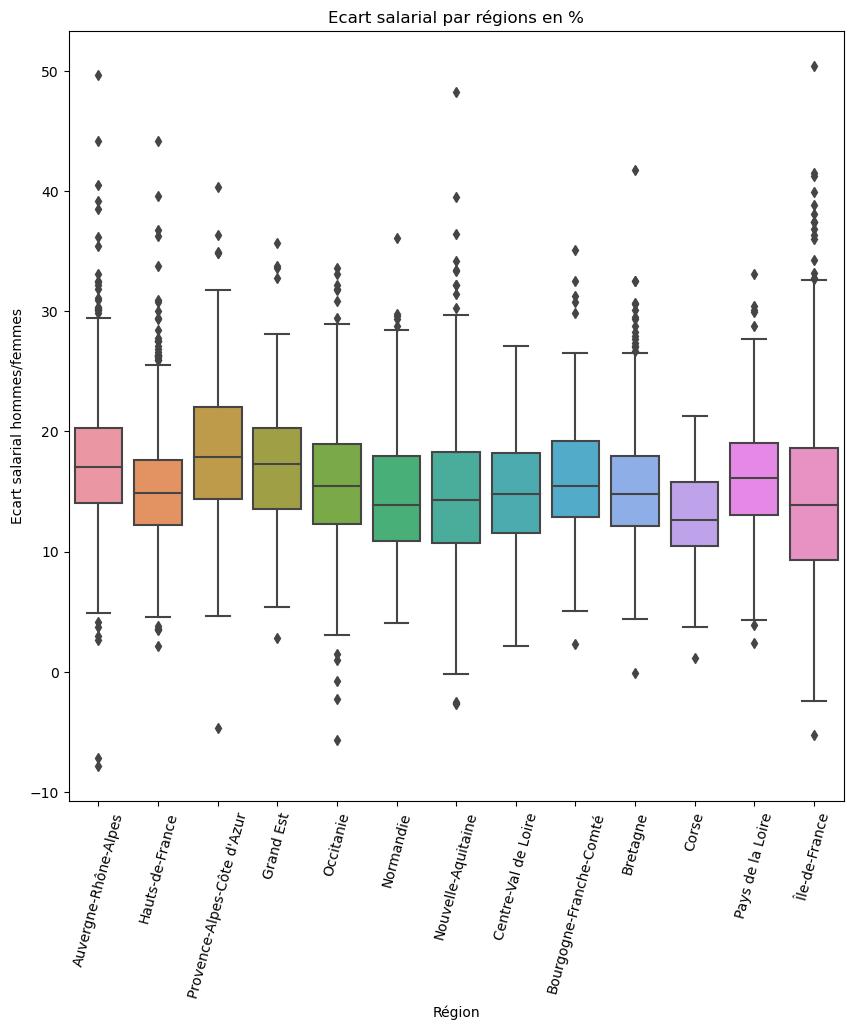

In [81]:
# Création d'un boxplot de la répartition de l'écart salarial hommes/femmes par région
plt.figure(figsize=(10,10))
sns.boxplot(x=gdf['nom_region'],y=gdf['ecart_salaire_hommes_femmes'])
plt.xticks(rotation=75)
plt.xlabel('Région')
plt.ylabel("Ecart salarial hommes/femmes")
plt.title('Ecart salarial par régions en %');